# Importing

In [1]:
import numpy as np
import pandas as pd 
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,TfidfTransformer
from sklearn.utils.class_weight import compute_sample_weight

from sklearn.model_selection import train_test_split,learning_curve

from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


from sklearn.metrics import confusion_matrix,classification_report

In [2]:
!pip install --upgrade scikit-learn

  Using cached scikit_learn-0.24.2-cp38-cp38-win_amd64.whl (6.9 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\scikit_learn-0.23.2.dist-info\\COPYING'
Consider using the `--user` option or check the permissions.



# Reading the data

In [3]:
df=pd.read_csv('Job titles and industries.csv')

In [4]:
df.head()

,job title,industry
0,technical support and helpdesk supervisor - co...,IT
1,senior technical support engineer,IT
2,head of it services,IT
3,js front end engineer,IT
4,network and telephony controller,IT


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8586 entries, 0 to 8585
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   job title  8586 non-null   object
 1   industry   8586 non-null   object
dtypes: object(2)
memory usage: 134.3+ KB


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='industry', ylabel='count'>

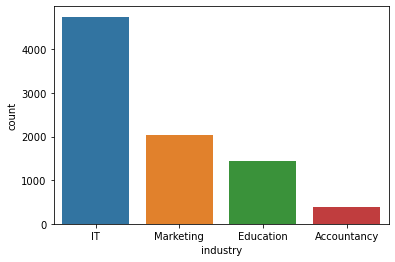

In [6]:
sns.countplot(df['industry'])

# Data Cleaning

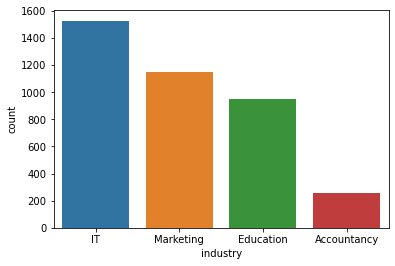

In [7]:
clean_df = df.drop_duplicates(subset="job title")
sns.countplot(x='industry',data=clean_df)
plt.show()

In [8]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3890 entries, 0 to 8585
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   job title  3890 non-null   object
 1   industry   3890 non-null   object
dtypes: object(2)
memory usage: 251.2+ KB


In [9]:
#regex functions for data cleaning "it didn't improve the classifer"

def rmv_num(text):
  return re.sub(r"\d", "", text)

def rmv_symbole(text):
  return re.sub(r'[^\w]', ' ', text)

def rmv_tabs(text):
  return re.sub(' +', ' ',text)

def rmv_mutipleletters(text):
  return re.sub(' \w\w ', ' ',text)

def rmv_oneletter(text):
  return re.sub(' \w ', ' ',text)

In [10]:
# applying the functions on the original df
df['job title']= df['job title'].apply(rmv_num).apply(rmv_symbole).apply(rmv_tabs).apply(rmv_mutipleletters).apply(rmv_oneletter)

# Train Test Split

In [11]:
X=clean_df['job title']
y=clean_df['industry']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=48)

In [13]:
# Estimating sample weights by class for unbalanced datasets.
weights = compute_sample_weight("balanced",y_train)

# Modeling

## Naive Bayes

In [14]:
nb = Pipeline([('TfidfVectorizer', TfidfVectorizer()),
               ('clf', MultinomialNB()),])

nb.fit(X_train, y_train, **{'clf__sample_weight': weights})
y_pred = nb.predict(X_test)

print('Classification report:\n\n{}'.format(classification_report(y_test, y_pred)))

Classification report:

              precision    recall  f1-score   support

 Accountancy       0.76      0.98      0.85        51
   Education       0.97      0.83      0.90       187
          IT       0.94      0.90      0.92       307
   Marketing       0.82      0.91      0.86       233

    accuracy                           0.89       778
   macro avg       0.87      0.91      0.88       778
weighted avg       0.90      0.89      0.89       778



## Linear SVM

In [15]:
sgd = Pipeline([('TfidfVectorizer', TfidfVectorizer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),])

sgd.fit(X_train, y_train, **{'clf__sample_weight': weights})

y_pred = sgd.predict(X_test)

print('Classification report:\n\n{}'.format(
    classification_report(y_test, y_pred)))

Classification report:

              precision    recall  f1-score   support

 Accountancy       0.83      0.96      0.89        51
   Education       0.96      0.86      0.90       187
          IT       0.93      0.92      0.92       307
   Marketing       0.84      0.89      0.86       233

    accuracy                           0.90       778
   macro avg       0.89      0.91      0.90       778
weighted avg       0.90      0.90      0.90       778



## Logestic Regression

In [16]:
logreg = Pipeline([('TfidfVectorizer', TfidfVectorizer()),
                ('clf', LogisticRegression(n_jobs=20, C=1e5)),
               ])

logreg.fit(X_train, y_train, **{'clf__sample_weight': weights})

y_pred = logreg.predict(X_test)
print('Classification report:\n\n{}'.format(
    classification_report(y_test, y_pred))
)

Classification report:

              precision    recall  f1-score   support

 Accountancy       0.85      0.78      0.82        51
   Education       0.87      0.88      0.87       187
          IT       0.90      0.90      0.90       307
   Marketing       0.83      0.85      0.84       233

    accuracy                           0.87       778
   macro avg       0.87      0.85      0.86       778
weighted avg       0.87      0.87      0.87       778



## Random Forest

In [17]:
RF = Pipeline(
    [ ('TfidfVectorizer', TfidfVectorizer()),
        ('Logistic_Regression', RandomForestClassifier(n_estimators=100,class_weight='balanced'))
    ],
    verbose=True
)

In [18]:
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)
print('Classification report:\n\n{}'.format(
    classification_report(y_test, y_pred))
)

[Pipeline] ... (step 1 of 2) Processing TfidfVectorizer, total=   0.0s
[Pipeline]  (step 2 of 2) Processing Logistic_Regression, total=   1.1s
Classification report:

              precision    recall  f1-score   support

 Accountancy       0.91      0.80      0.85        51
   Education       0.90      0.86      0.88       187
          IT       0.90      0.92      0.91       307
   Marketing       0.83      0.85      0.84       233

    accuracy                           0.88       778
   macro avg       0.88      0.86      0.87       778
weighted avg       0.88      0.88      0.88       778



## Confusion Matrix

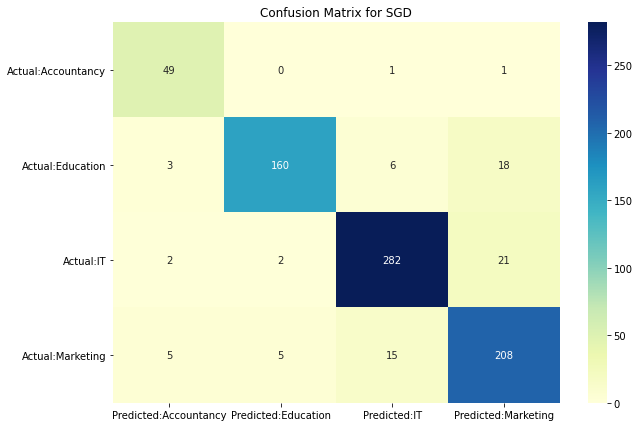

In [19]:
y_pred = sgd.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,7))
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:Accountancy','Predicted:Education','Predicted:IT','Predicted:Marketing']
                                  ,index=['Actual:Accountancy','Actual:Education','Actual:IT','Actual:Marketing'])
sns.heatmap(conf_matrix, annot=True, fmt='d',cmap="YlGnBu")

plt.title('Confusion Matrix for SGD')
plt.show()

# Saving Model

In [20]:
from joblib import dump, load
dump(sgd, 'model.joblib')

['model.joblib']